In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Loading the Dataset

### Loading the test set (12/2025 Data)

In [2]:
test_set = pd.read_csv('california/CRMLSSold202512.csv')
test_set = test_set[(test_set['PropertySubType'] == 'SingleFamilyResidence') & (test_set['PropertyType'] == 'Residential')]

### Loading the training set (6+ months of data prior to 12/2025)

In [3]:
training_set = pd.DataFrame()

for i in range(7, 12):
    if i < 10:
        month = '0' + str(i)
    else:
        month = str(i)
    monthly_data = pd.read_csv(f'california/CRMLSSold2025{month}.csv')
    monthly_data['month'] = month
    training_set = pd.concat([training_set, monthly_data])
training_set = training_set[(training_set['PropertySubType'] == 'SingleFamilyResidence') & (training_set['PropertyType'] == 'Residential')]
training_set = training_set.reset_index(drop=True)

In [47]:
training_set.columns.sort_values

<bound method Index.sort_values of Index(['BuyerAgentAOR', 'ListAgentAOR', 'Flooring', 'ViewYN', 'WaterfrontYN',
       'BasementYN', 'PoolPrivateYN', 'OriginalListPrice', 'ListingKey',
       'ListAgentEmail', 'CloseDate', 'ClosePrice', 'ListAgentFirstName',
       'ListAgentLastName', 'Latitude', 'Longitude', 'UnparsedAddress',
       'PropertyType', 'LivingArea', 'ListPrice', 'DaysOnMarket',
       'ListOfficeName', 'BuyerOfficeName', 'CoListOfficeName',
       'ListAgentFullName', 'CoListAgentFirstName', 'CoListAgentLastName',
       'BuyerAgentMlsId', 'BuyerAgentFirstName', 'BuyerAgentLastName',
       'FireplacesTotal', 'AssociationFeeFrequency', 'AboveGradeFinishedArea',
       'ListingKeyNumeric', 'MLSAreaMajor', 'TaxAnnualAmount',
       'CountyOrParish', 'MlsStatus', 'ElementarySchool', 'AttachedGarageYN',
       'ParkingTotal', 'BuilderName', 'PropertySubType', 'LotSizeAcres',
       'SubdivisionName', 'BuyerOfficeAOR', 'YearBuilt', 'StreetNumberNumeric',
       'ListingId',

ClosePrice --> what is being predicted

### Plot Distributions of Different Variables

<Axes: xlabel='ClosePrice', ylabel='Count'>

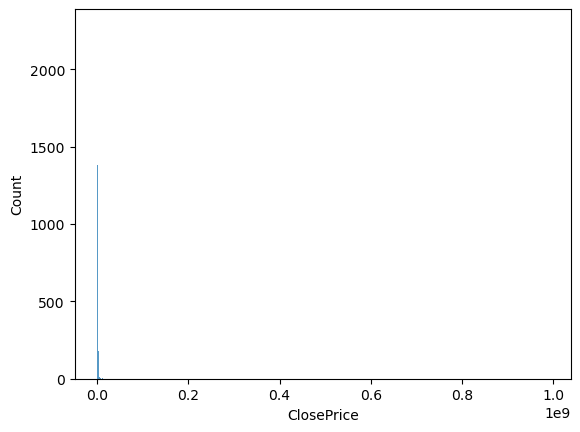

In [4]:
sns.histplot(x='ClosePrice', data=training_set, bins="auto")

In [5]:
training_set['LivingArea']

0        1810.0
1        2987.0
2        2007.0
3        2234.0
4        2967.0
          ...  
56787    1980.0
56788    1441.0
56789    2160.0
56790    1800.0
56791    2672.0
Name: LivingArea, Length: 56792, dtype: float64

<Axes: xlabel='LivingArea', ylabel='Count'>

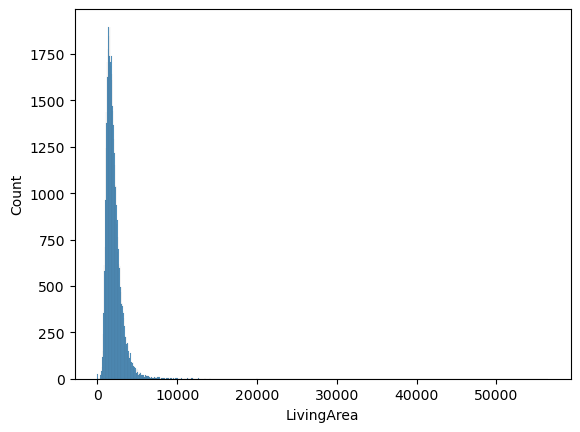

In [6]:
sns.histplot(x='LivingArea', data=training_set)

<Axes: xlabel='BedroomsTotal', ylabel='Count'>

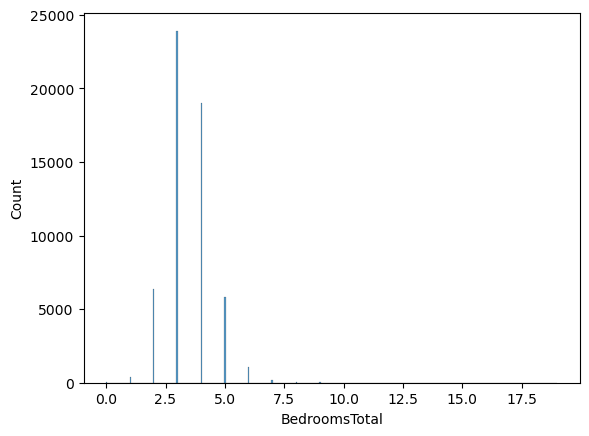

In [7]:
sns.histplot(x='BedroomsTotal', data=training_set)

<Axes: xlabel='BathroomsTotalInteger', ylabel='Count'>

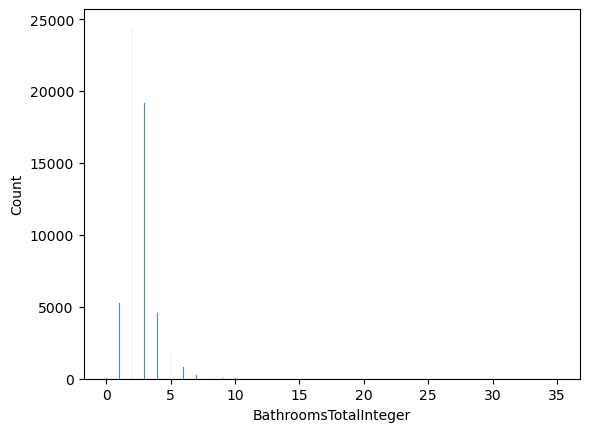

In [8]:
sns.histplot(x='BathroomsTotalInteger', data=training_set)

<Axes: xlabel='LotSizeArea', ylabel='Count'>

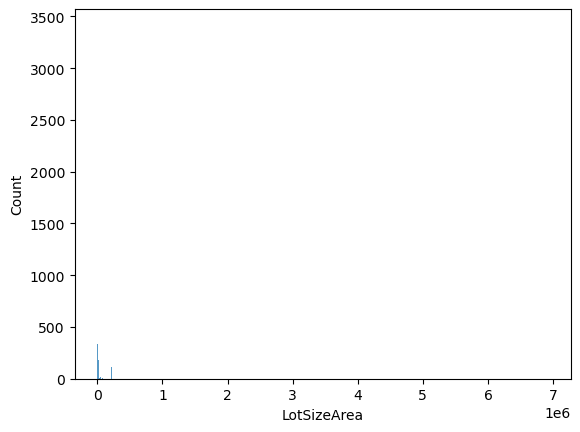

In [9]:
sns.histplot(x='LotSizeArea', data=training_set)

<Axes: xlabel='YearBuilt', ylabel='Count'>

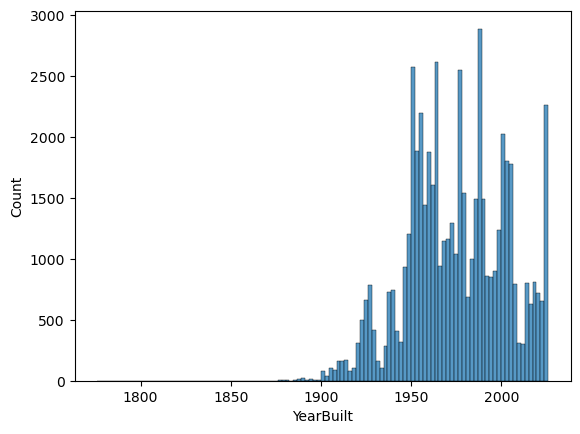

In [34]:
sns.histplot(x='YearBuilt', data=training_set)

(0.0, 899.45)

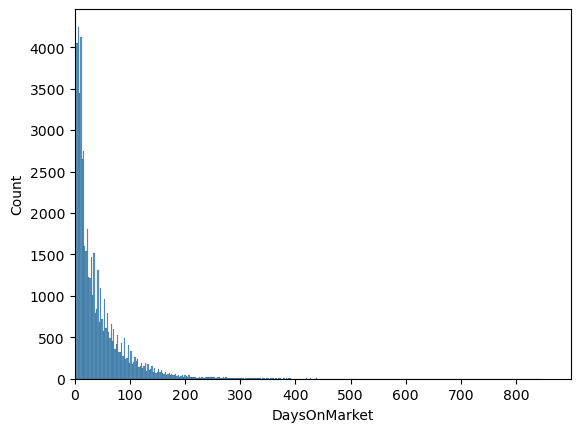

In [40]:
sns.histplot(x='DaysOnMarket', data=training_set)
plt.xlim(0)

<Axes: xlabel='AssociationFee', ylabel='Count'>

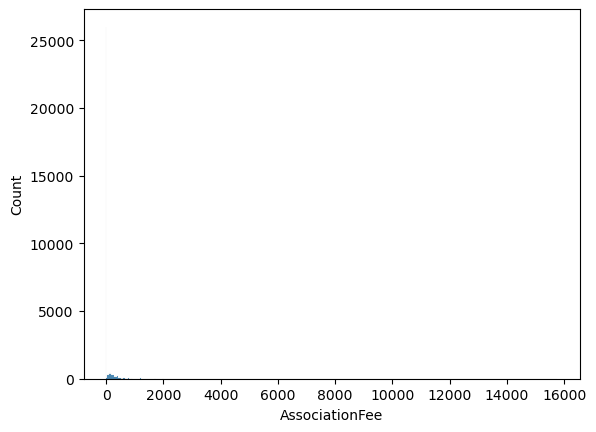

In [48]:
sns.histplot(x='AssociationFee', data=training_set)

### Creating new features with price differences using the following columns

OriginalListPrice = The original price of the property on the initial agreement between the seller and the seller's broker

ListPrice = The current price of the property as determined by the seller and the seller's broker. For auctions this is the minimum or reserve price

ClosePrice = The amount of money paid by the purchaser to the seller for the property under agreement



In [11]:
price_df = training_set[['OriginalListPrice', 'ListPrice', 'ClosePrice']]
price_df['diff_orig_close'] = price_df['OriginalListPrice'] - price_df['ClosePrice']
price_df['diff_currList_close'] = price_df['ListPrice'] - price_df['ClosePrice']

/var/folders/r2/plrh1xlx4_b6wmq2hw3_92dw0000gn/T/ipykernel_18941/2298561595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['diff_orig_close'] = price_df['OriginalListPrice'] - price_df['ClosePrice']
/var/folders/r2/plrh1xlx4_b6wmq2hw3_92dw0000gn/T/ipykernel_18941/2298561595.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['diff_currList_close'] = price_df['ListPrice'] - price_df['ClosePrice']


- Helps us to analyze seller behavior: whether houses are sold below, at, or above the original listing price

- identify patterns in how housing price is reduced

- Could be used as potential features

In [23]:
price_df['diff_orig_close'].sort_values(ascending=False)
price_df['diff_orig_close'].sort_values()

37478   -988521000.0
23610   -874125000.0
26458   -834964200.0
32384   -814160100.0
23987   -750713000.0
            ...     
47142            NaN
47168            NaN
47173            NaN
47204            NaN
47205            NaN
Name: diff_orig_close, Length: 56792, dtype: float64

In [25]:
price_df.iloc[23610] # likely one of the many error cases in the ClosePrice column

OriginalListPrice         875000.0
ListPrice                 875000.0
ClosePrice             875000000.0
diff_orig_close       -874125000.0
diff_currList_close   -874125000.0
Name: 23610, dtype: float64

<Axes: xlabel='diff_orig_close', ylabel='Count'>

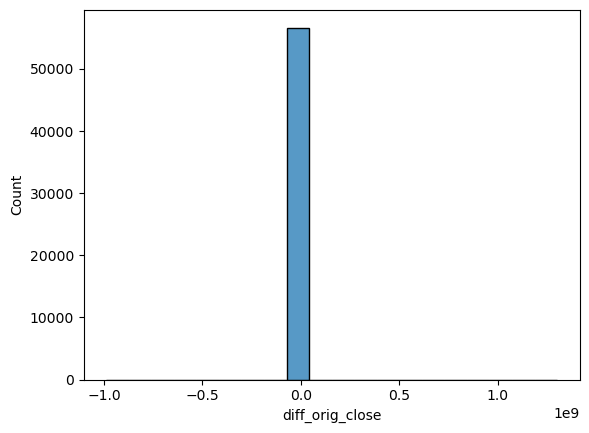

In [19]:
sns.histplot(x='diff_orig_close', data=price_df, bins=20)

<Axes: xlabel='diff_orig_close', ylabel='Count'>

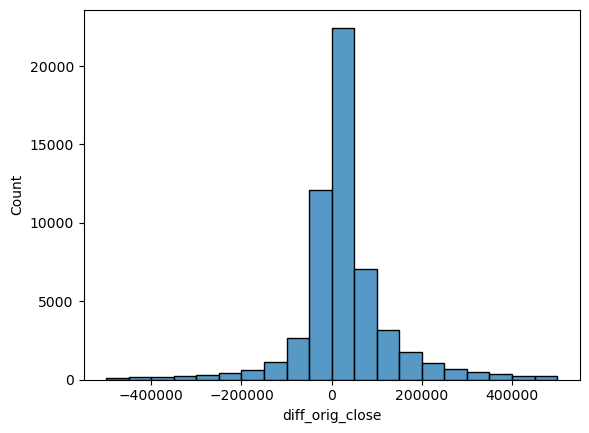

In [29]:
# Capping the difference at $500,000
price_df_capped_orig = price_df[price_df['diff_orig_close'].abs() <= 500_000]
sns.histplot(x='diff_orig_close', data=price_df_capped_orig, bins=20)

<Axes: xlabel='diff_currList_close', ylabel='Count'>

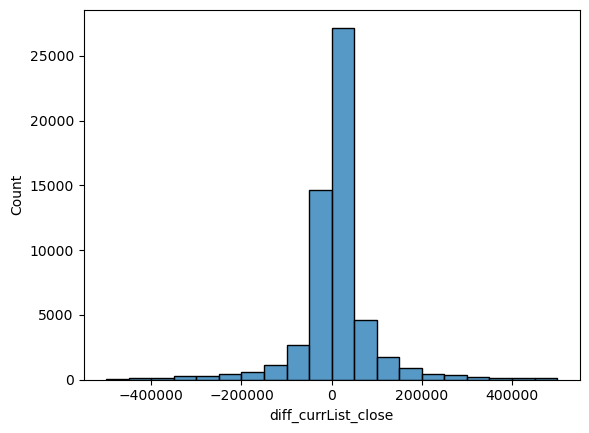

In [33]:
# Capping the difference at $500,000
price_df_capped_curr = price_df[price_df['diff_currList_close'].abs() <= 500_000]
sns.histplot(x='diff_currList_close', data=price_df_capped_curr, bins=20)

Both the differences between close price and original lising price and between close price and current listing price are centered around zero, meaning that sellers don't normally overprice or underprcie houses by extreme amounts.

### Scatter Plots

Regressing close price on different predictors

<Axes: xlabel='LivingArea', ylabel='ClosePrice'>

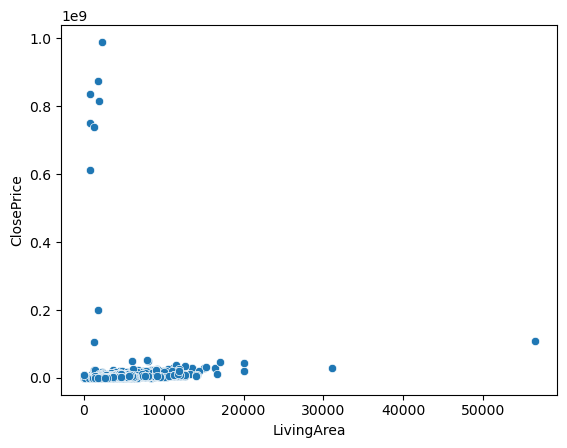

In [42]:
sns.scatterplot(x='LivingArea', y='ClosePrice', data=training_set)

(0.0, 899.45)

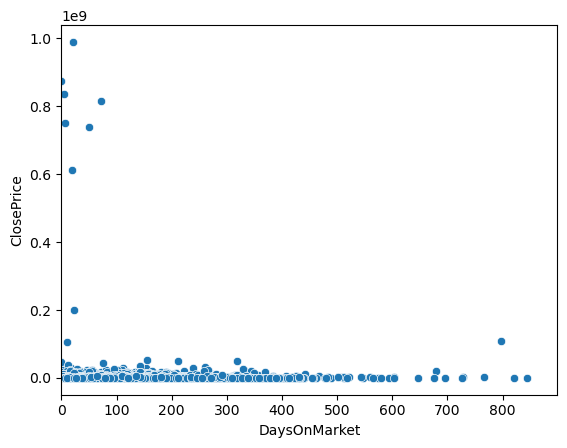

In [46]:
sns.scatterplot(x='DaysOnMarket', y='ClosePrice', data=training_set)
plt.xlim(0)

### Count Plots For Categorical Variables

<Axes: xlabel='Stories', ylabel='count'>

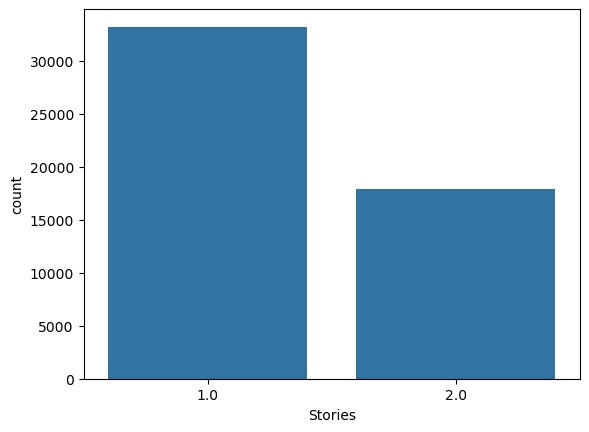

In [51]:
sns.countplot(x='Stories', data=training_set)

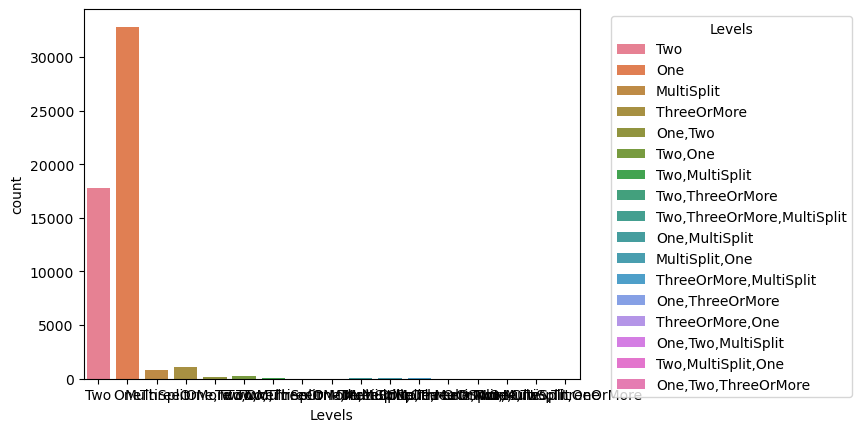

In [57]:
sns.countplot(x='Levels', hue='Levels', data=training_set)
plt.legend(title='Levels', bbox_to_anchor=(1.05, 1), loc='upper left')
